In [27]:
import pandas as pd
import seaborn as sns

In [28]:
df = pd.read_csv('result.csv')
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,popularity_level
0,0.84800,0.400,165360,0.205,0.000000,7,0.4000,-11.794,1.0,0.0270,79.545,0.357,0
1,0.56000,0.686,127027,0.844,0.000001,10,0.1200,-6.163,2.0,0.0484,109.039,0.897,0
2,0.57100,0.467,148533,0.277,0.001160,9,0.0762,-13.049,5.0,0.0302,86.895,0.597,0
3,0.78900,0.522,134520,0.673,0.000000,11,0.3180,-3.480,5.0,0.0425,141.010,0.659,0
4,0.60800,0.635,145013,0.829,0.000000,9,0.1860,-5.125,6.0,0.0471,139.426,0.963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,0.02640,0.611,132303,0.688,0.000000,1,0.2510,-5.688,94.0,0.3410,178.462,0.393,2
9512,0.69200,0.824,209438,0.588,0.000104,6,0.1490,-6.400,94.0,0.0924,98.027,0.513,2
9513,0.32100,0.834,247059,0.454,0.000006,1,0.1140,-9.750,95.0,0.2010,81.618,0.837,2
9514,0.10400,0.896,196653,0.586,0.000000,10,0.7900,-6.687,95.0,0.0559,116.971,0.642,2


                  acousticness  danceability   duration_ms    energy  \
acousticness          1.000000     -0.232164 -2.465456e-01 -0.591214   
danceability         -0.232164      1.000000  5.282609e-02  0.120989   
duration_ms          -0.246546      0.052826  1.000000e+00  0.060893   
energy               -0.591214      0.120989  6.089304e-02  1.000000   
instrumentalness     -0.015606      0.025753  7.949350e-02  0.013530   
key                  -0.008803      0.018271  7.520947e-07  0.012761   
liveness             -0.010319     -0.108635 -3.472777e-02  0.130367   
loudness             -0.393282      0.067248 -5.181593e-02  0.691635   
popularity           -0.261673      0.139594  6.299565e-02  0.182244   
speechiness          -0.140061      0.264973 -7.907883e-03  0.110643   
tempo                -0.116051     -0.179754 -1.562891e-02  0.168290   
valence              -0.123871      0.407525 -1.452879e-01  0.332122   

                  instrumentalness           key  liveness  lou

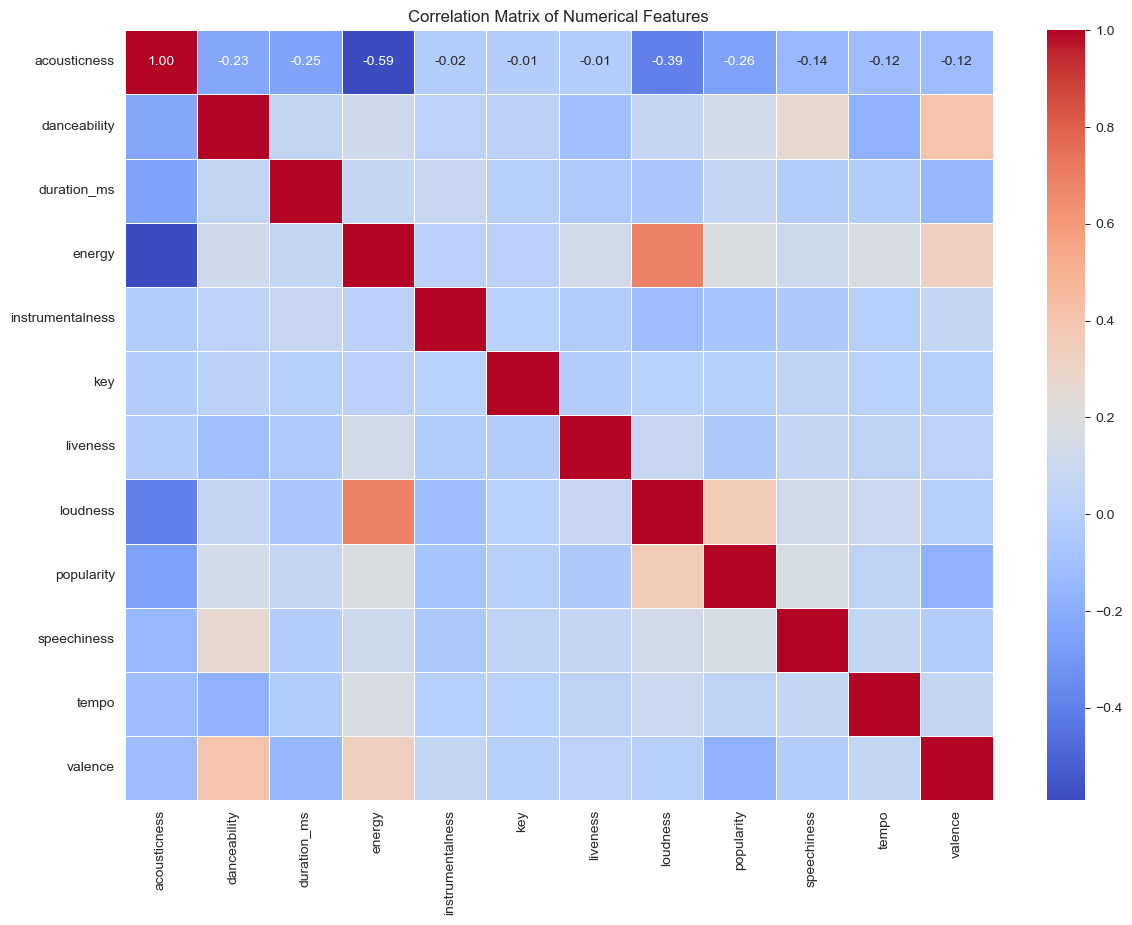

Correlation with Popularity:
 popularity          1.000000
loudness            0.362895
energy              0.182244
speechiness         0.160917
danceability        0.139594
duration_ms         0.062996
tempo               0.033162
key                 0.004561
liveness           -0.042254
instrumentalness   -0.081350
valence            -0.179310
acousticness       -0.261673
Name: popularity, dtype: float64


In [29]:
from matplotlib import pyplot as plt
df = df.drop(columns=['popularity_level'])
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(14, 10))

# seaborn 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
popularity_corr = correlation_matrix['popularity'].sort_values(ascending=False)
print("Correlation with Popularity:\n", popularity_corr)

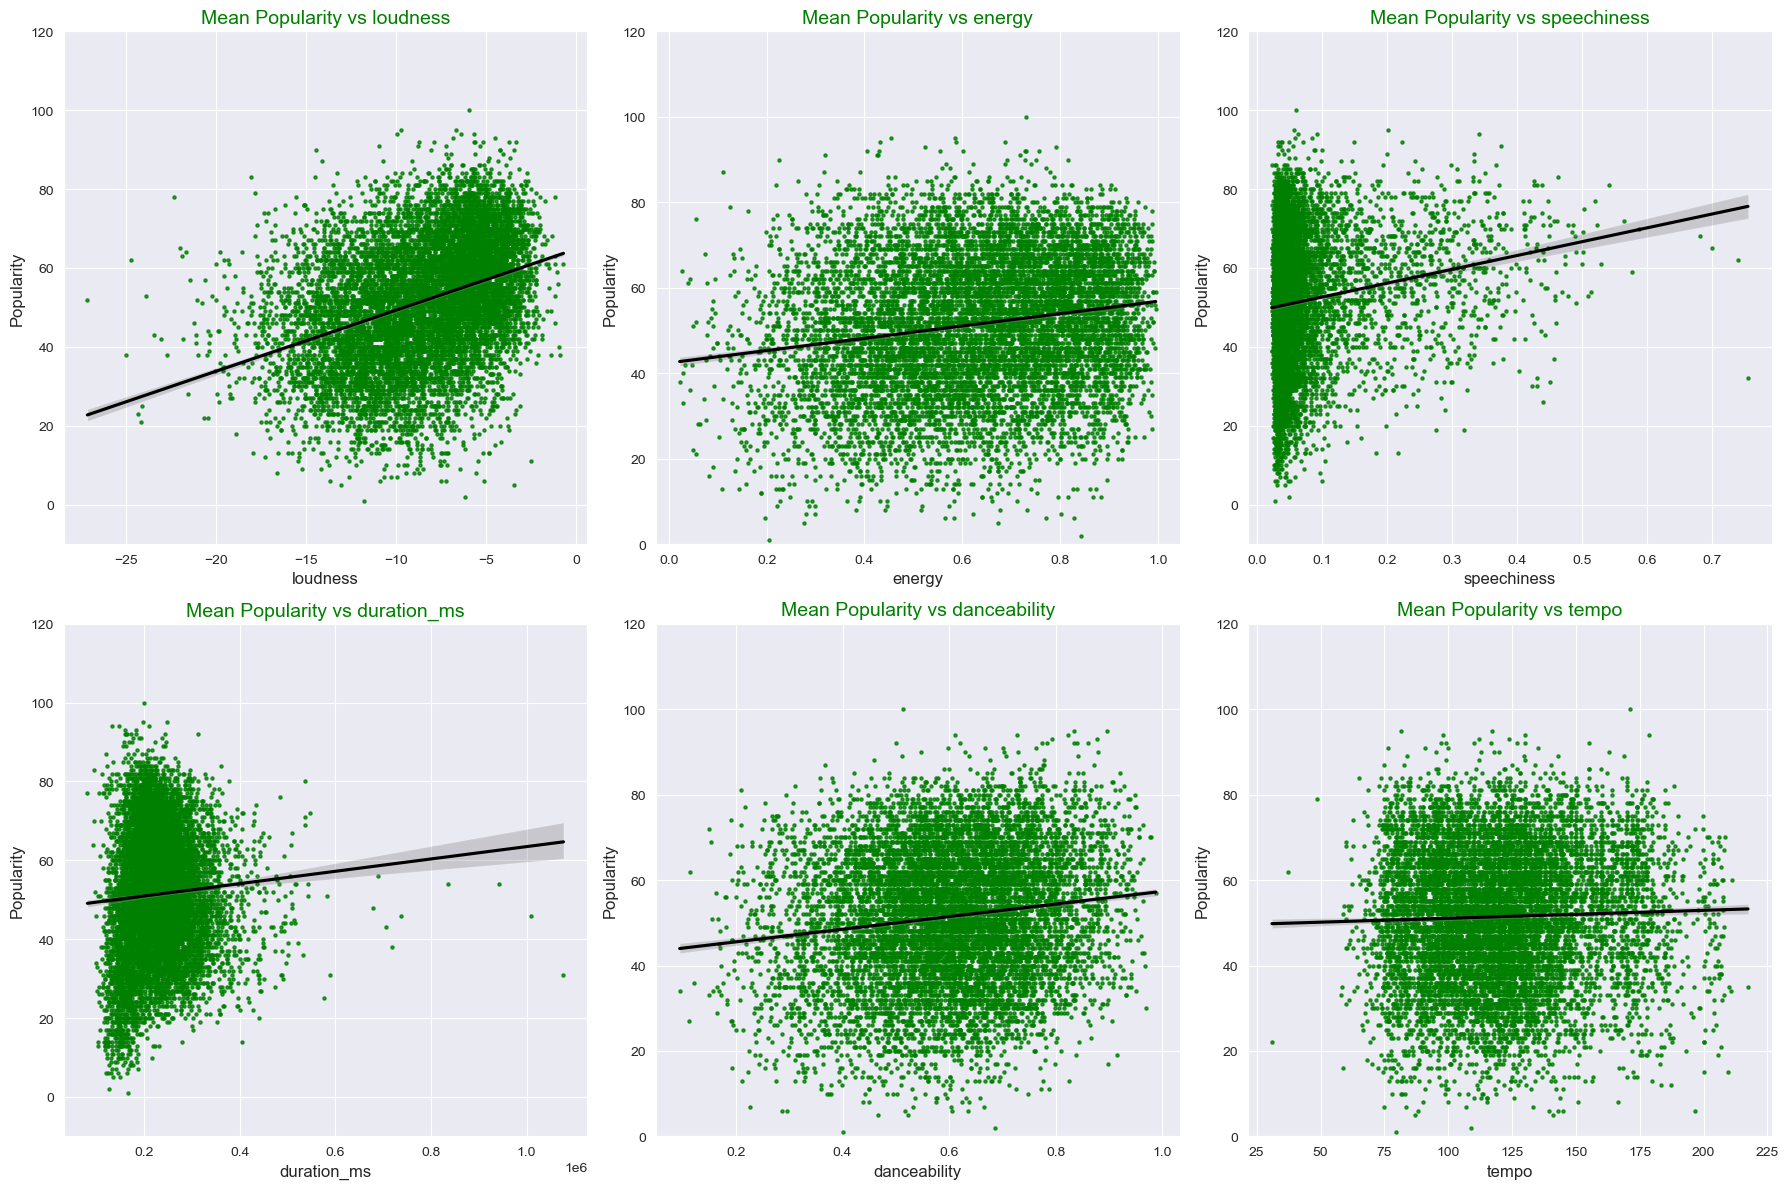

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def regress_plot(ax, x, y, data, xlab, ylab, titl, ylim):
    sns.regplot(ax=ax, x=x, y=y, data=data, scatter_kws={'color': 'g', "s": 5}, line_kws={'color': 'black'})
    ax.set_xlabel(xlab, fontsize=12)
    ax.set_ylabel(ylab, fontsize=12)
    ax.set_title(titl, fontsize=14, color='green')
    ax.set_ylim(ylim)

features = ['loudness', 'energy', 'speechiness', 'duration_ms', 'danceability', 'tempo']


ylims = {
    'loudness': (-10, 120),
    'energy': (0, 120),
    'speechiness': (-10, 120),
    'duration_ms' :(-10, 120),
    'danceability': (0, 120),
    'tempo': (0, 120)
}

#subplo
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for ax, feature in zip(axes.flatten(), features):
    if feature in df.columns:
        regress_plot(
            ax=ax,
            x=feature,
            y='popularity',
            data=df,
            xlab=feature,
            ylab='Popularity',
            titl=f'Mean Popularity vs {feature}',
            ylim=ylims[feature]
        )
    else:
        print(f"Feature {feature} not found in DataFrame columns.")

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


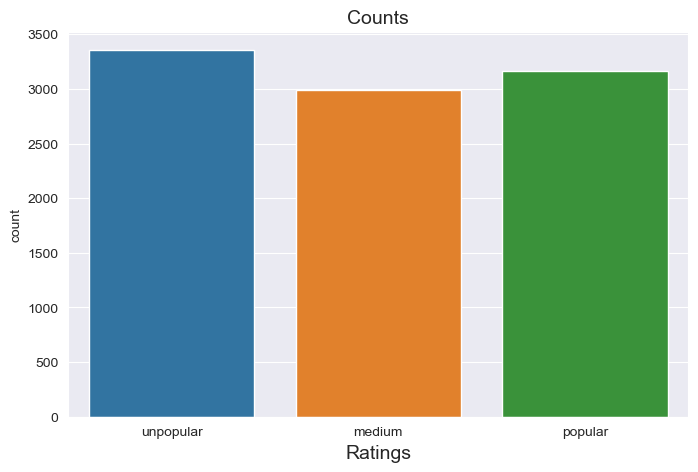

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame that has been previously defined

# Discretize the 'popularity' column into three categories using qcut
df['popularity_level'] = pd.qcut(df['popularity'], q=3, labels=[0, 1, 2])

# Copy the dataframe and create a new column 'pop_rating'
classified = df.copy()
classified['pop_rating'] = classified['popularity_level'].map({0: 'unpopular', 1: 'medium', 2: 'popular'})

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = sns.countplot(x='pop_rating', data=classified)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)
plt.show()
